# 1. What was the change in price of the stock overtime?

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300.0,1394.209961,GOOGLE
2019-12-11,1750.000000,1735.709961,1741.670044,1748.719971,2097600.0,1748.719971,AMAZON
2019-04-29,130.179993,129.350006,129.899994,129.770004,16324200.0,128.075485,MICROSOFT
2019-12-09,270.799988,264.910004,270.000000,266.920013,32010600.0,266.288025,APPLE
2019-10-30,245.300003,241.210007,244.759995,243.259995,31130500.0,241.957611,APPLE
2019-08-08,138.990005,135.929993,136.600006,138.889999,27496500.0,137.583801,MICROSOFT
2019-07-02,136.589996,135.339996,136.119995,136.580002,15237800.0,135.295517,MICROSOFT
2020-03-11,281.220001,271.859985,277.390015,275.429993,63899700.0,275.429993,APPLE
2019-05-09,1169.660034,1150.849976,1159.030029,1162.380005,1185700.0,1162.380005,GOOGLE


In [5]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,244.671115,239.223028,241.631155,242.190358,3.322597e+07,241.124512
std,43.321571,42.057191,42.567660,42.940178,1.741454e+07,43.483331
min,177.919998,170.270004,175.440002,173.300003,1.136200e+07,171.719727
25%,206.434998,203.295006,204.284996,204.514999,2.167400e+07,202.586929
50%,237.639999,233.520004,234.899994,235.320007,2.762040e+07,234.060135
75%,278.250000,267.910004,270.399994,273.439987,3.795705e+07,273.439987
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [6]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-04-22 to 2020-04-17
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          251 non-null    float64
 1   Low           251 non-null    float64
 2   Open          251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    float64
 5   Adj Close     251 non-null    float64
 6   company_name  251 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.7+ KB


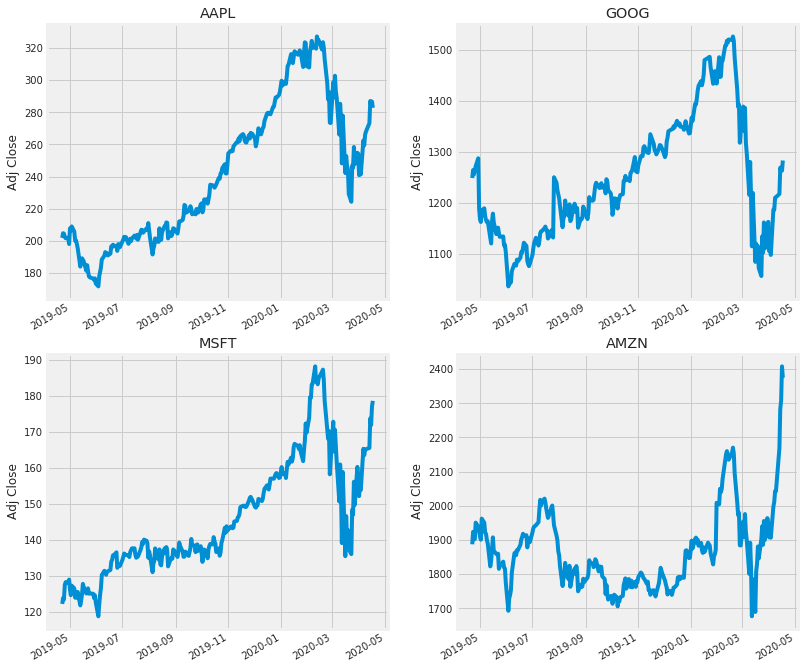

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

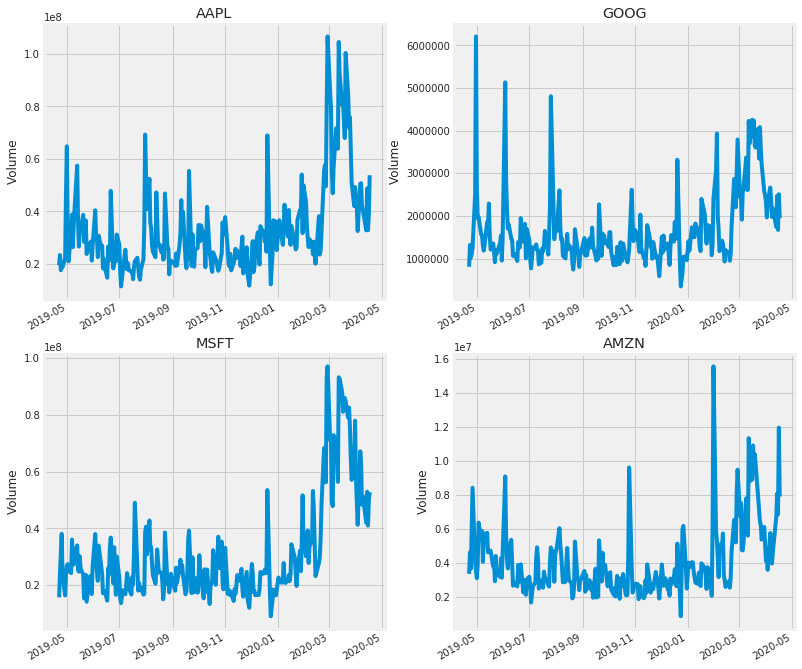

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [10]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


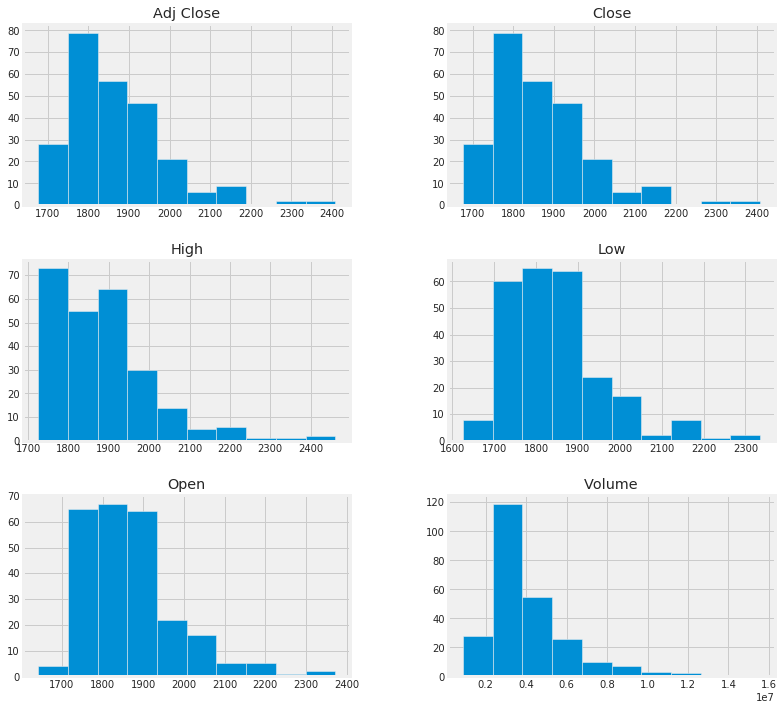

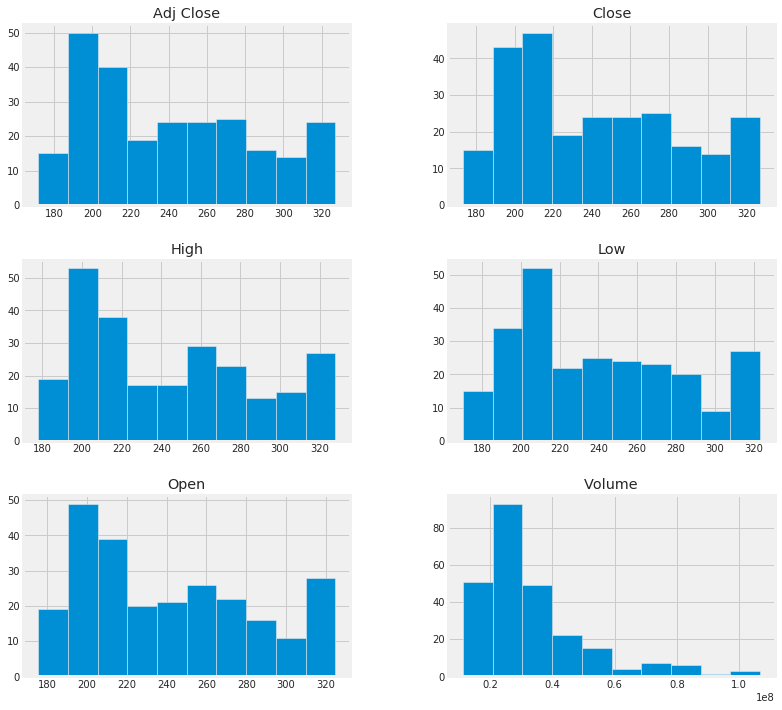

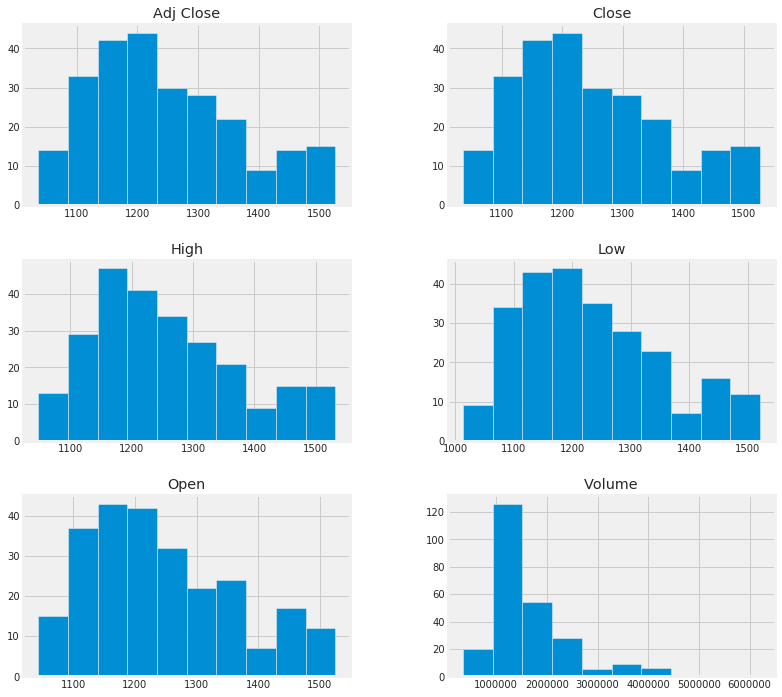

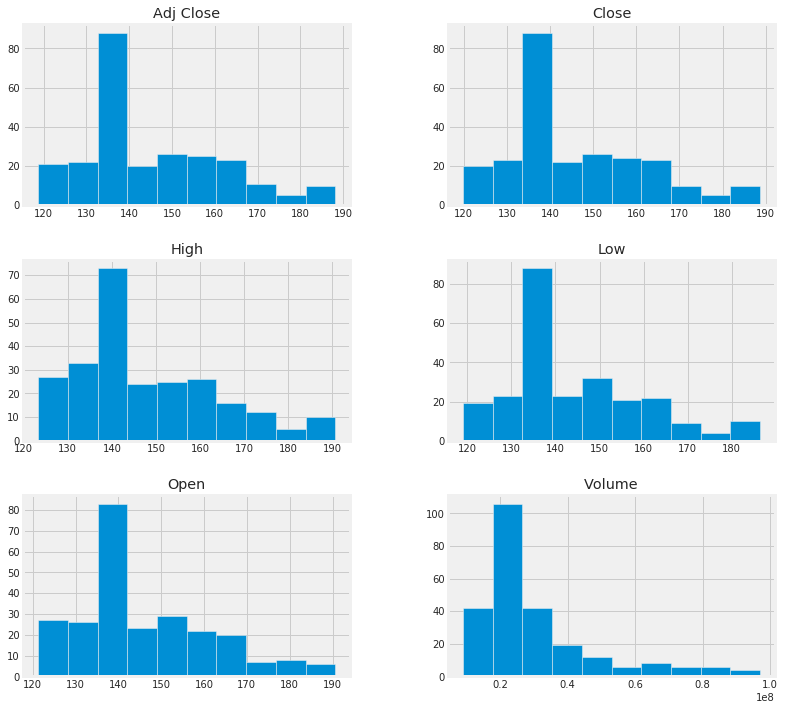

In [11]:
df.groupby("company_name").hist(figsize=(12, 12));

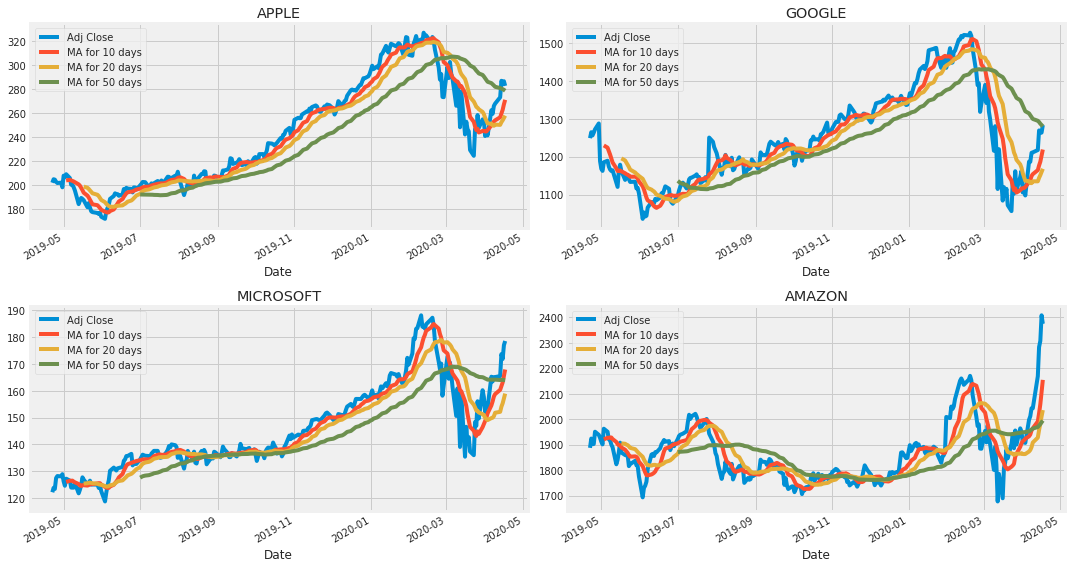

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

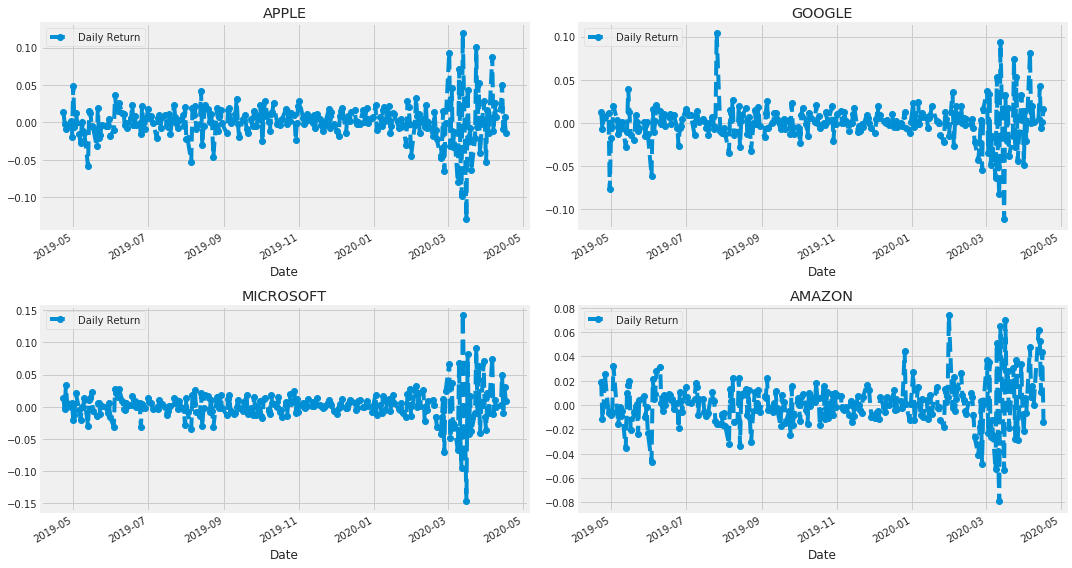

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

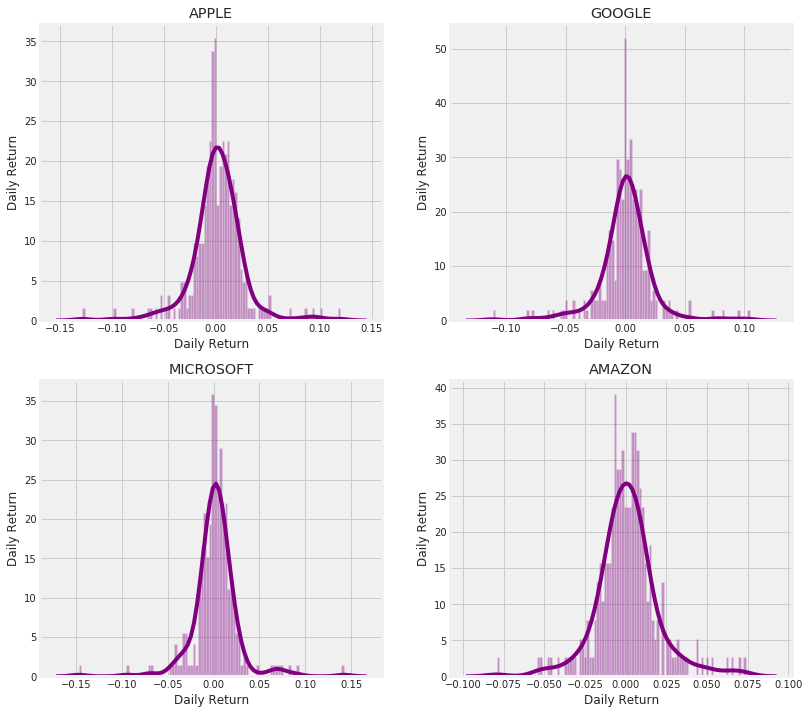

In [14]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()

# 4. What was the correlation between different stocks closing prices?

In [15]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,201.887497,1248.839966,122.143959,1887.310059
2019-04-23,204.799362,1264.550049,123.802032,1923.770020
2019-04-24,204.483505,1256.000000,123.377647,1901.750000
2019-04-25,202.627808,1263.449951,127.463577,1902.250000
2019-04-26,201.660461,1272.180054,128.193909,1950.630005


In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-22,NaN,NaN,NaN,NaN
2019-04-23,0.014423,0.012580,0.013575,0.019318
2019-04-24,-0.001542,-0.006761,-0.003428,-0.011446
2019-04-25,-0.009075,0.005931,0.033117,0.000263
2019-04-26,-0.004774,0.006910,0.005730,0.025433


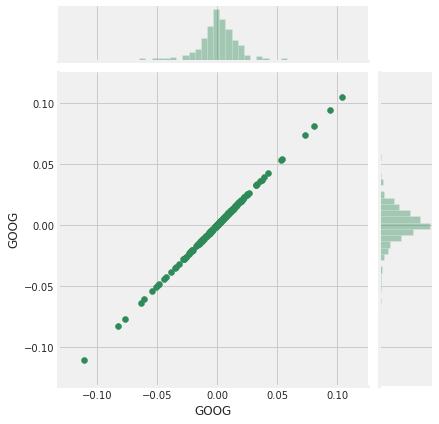

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

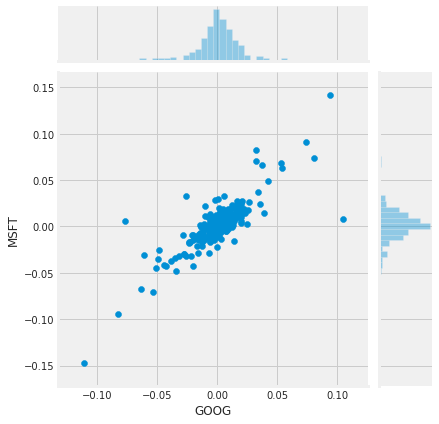

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

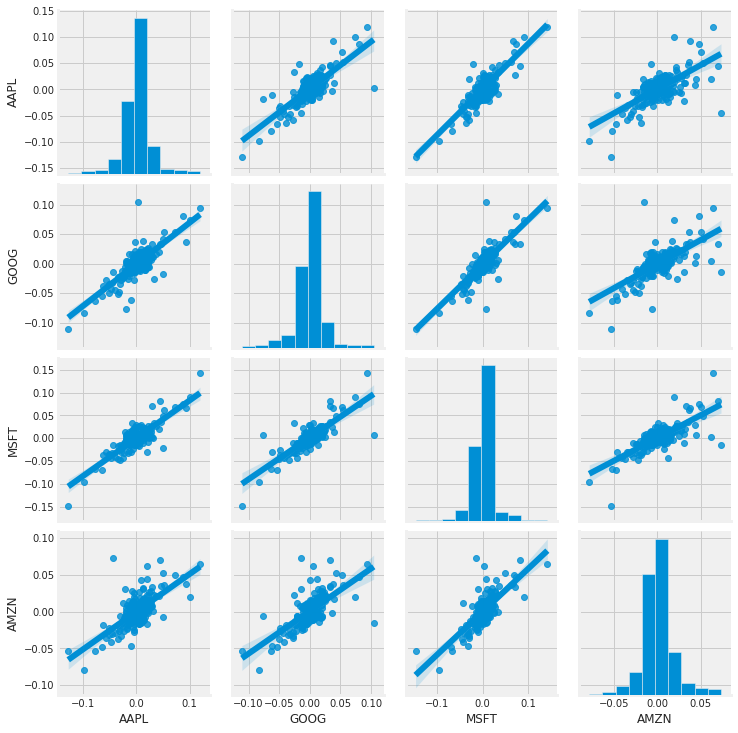

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

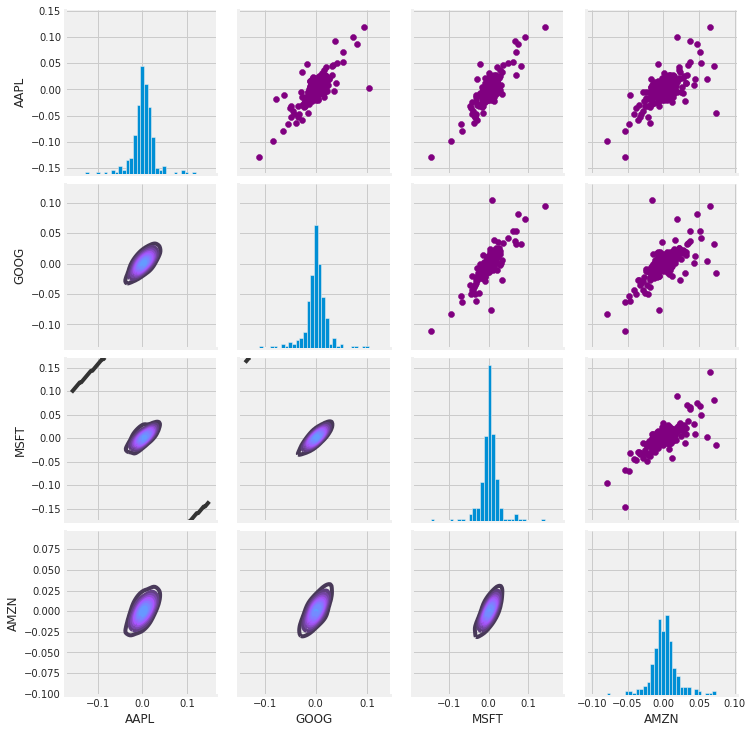

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

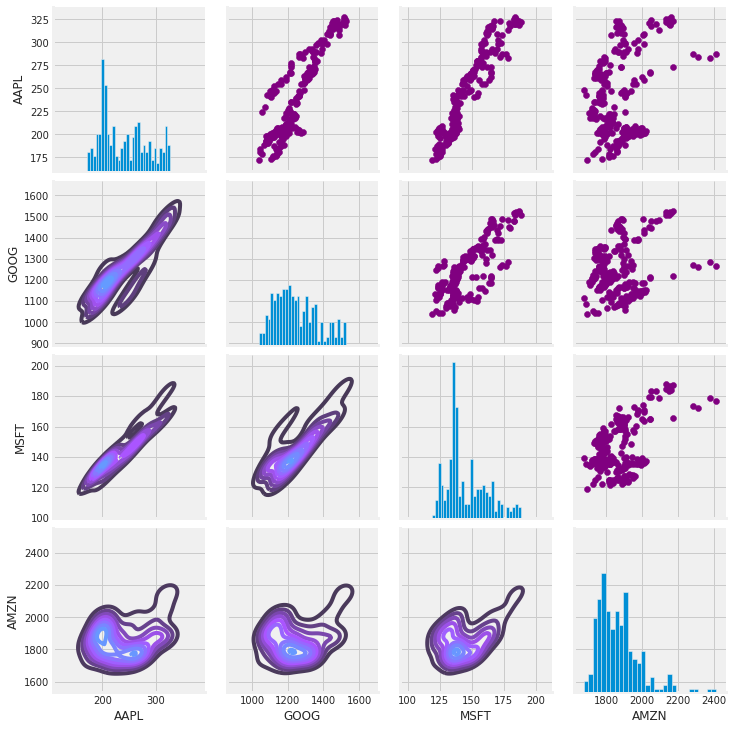

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

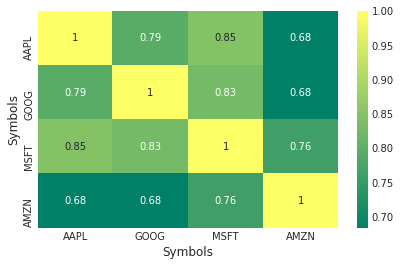

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

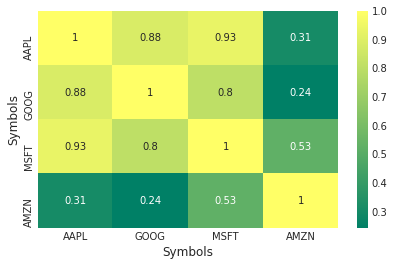

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 5. How much value do we put at risk by investing in a particular stock?

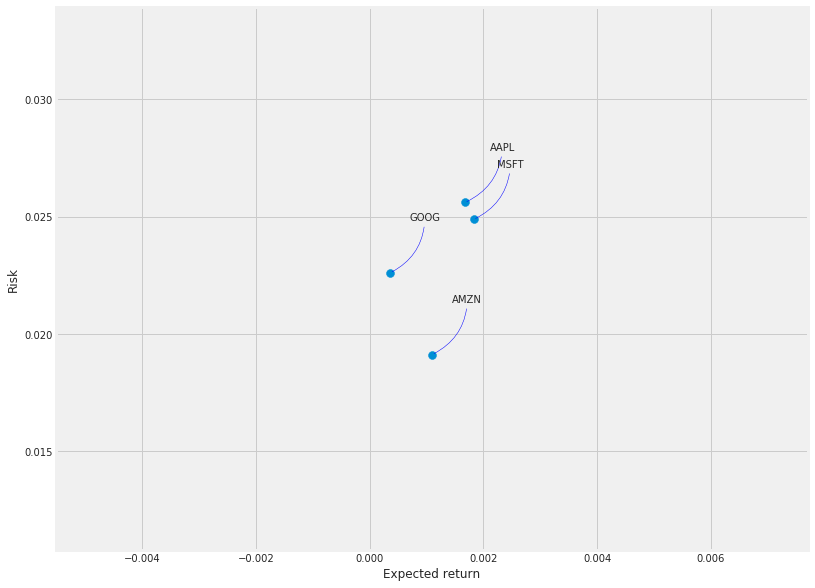

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [25]:
#Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-04-08')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-04-02,245.149994,236.899994,240.339996,244.929993,41483500.0,244.929993
2020-04-03,245.699997,238.970001,242.800003,241.410004,32470000.0,241.410004
2020-04-06,263.109985,249.380005,250.899994,262.470001,50455100.0,262.470001


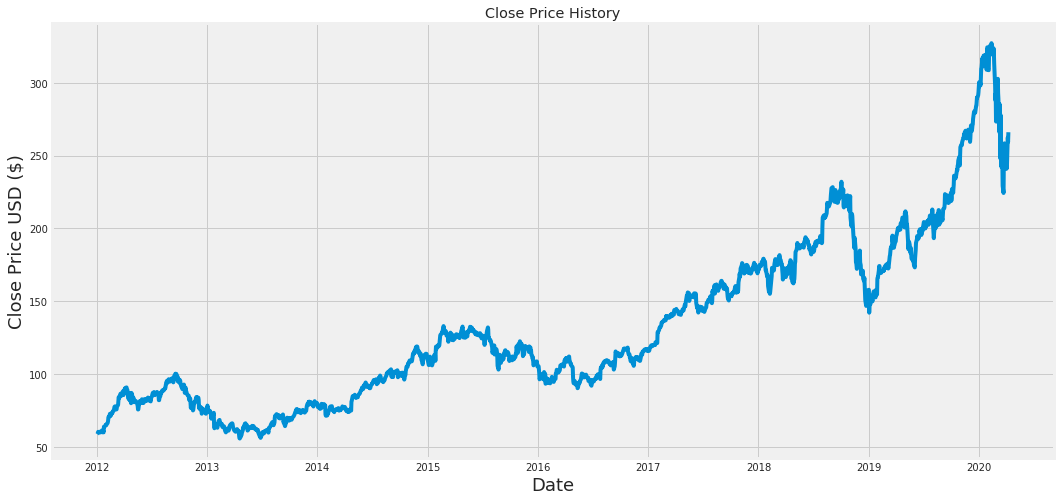

In [26]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1664

In [28]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.7615047 ],
       [0.75030391],
       [0.77476879]])

In [29]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [30]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1604, 60, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

Using TensorFlow backend.


In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1604/1604 [==============================] - 607s 378ms/step - loss: 6.0464e-04


In [35]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [36]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [37]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [38]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14.455841836633534

/home/maus/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


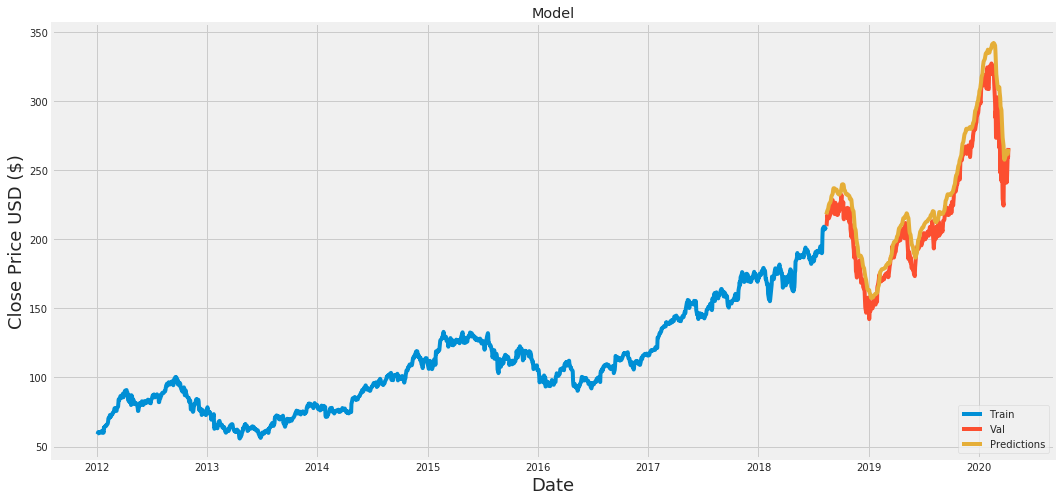

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-14,209.750000,217.976044
2018-08-15,210.240005,218.758347
2018-08-16,213.320007,219.482285
2018-08-17,217.580002,220.495880
2018-08-20,215.460007,222.072128
...,...,...
2020-04-02,244.929993,263.386230
2020-04-03,241.410004,262.841888
2020-04-06,262.470001,261.724152
